In [95]:
from scipy.optimize import minimize, NonlinearConstraint
import numpy as np 
import matplotlib.pyplot as plt


In [96]:
import numpy as np
from itertools import permutations

def permanent(matrix):
    n = len(matrix)
    perm_sum = 0

    for perm in permutations(range(n)):
        product = 1
        for i in range(n):
            product *= matrix[i, perm[i]]
        perm_sum += product

    return perm_sum

In [97]:
def idxs_delete(bitstring):

    idx_to_delete = []
    for i,bit in enumerate(bitstring):
        if int(bit) == 0:
            idx_to_delete.append(i)
            
    return np.array(idx_to_delete)

In [98]:
def drop_columns_and_rows(matrix, input_state):
    
    # Convert binary string to a list of integers
    indices_to_drop = idxs_delete(input_state)

    # Drop the specified columns and rows
    if indices_to_drop.size == 0:
        return matrix
    else:
        new_matrix = np.delete(matrix, indices_to_drop, axis=0)
        new_matrix = np.delete(new_matrix, indices_to_drop, axis=1)
        return new_matrix

In [99]:
def generate_input_states(inp_length):
    try:
        input_states = [format(i, f'0{inp_length}b') for i in range(2**inp_length)]
    except:
        input_states = []
        print('Error')
        
    return input_states

In [100]:
def return_permanents(matrix):
    
    input_states = generate_input_states(int(len(matrix)/2))
    perm_list = []
    
    for inp_state in input_states:
        perm_list.append(permanent(drop_columns_and_rows(matrix, inp_state)))
        
    return np.array(perm_list)

In [101]:
N = 4 #number of qubits
A_target = np.array([[1, 1], [1, -1]])
#A_target = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) 
print(A_target)

[[ 1  1]
 [ 1 -1]]


In [102]:
#find A function
def permanent_a(U_matrix):
    A = np.dot(np.transpose(U_matrix),U_matrix)
    #print(A)
    return A[:3,:3]

In [123]:
#cost function
def cost_fun(U_vector): 
    #reshape to matrix
    U = U_vector.reshape(N,N)
    U = U/ np.linalg.norm(U,2) 
    A_vect = return_permanents(U)
    A_tar_vect = A_target.flatten()
    #print("permanent matrix: ", A_vect)
    F = np.abs(np.dot(A_tar_vect, A_vect))/((N/2)**2*abs(A_vect[0]))
    #print(F)
    S = A_vect[0]**2            #success probability
    
    return -1*(F)

In [124]:
test = np.array([
    [-1/3, -np.sqrt(2)/3, np.sqrt(2)/3, 2/3],
    [np.sqrt(2)/3, -1/3, -2/3, np.sqrt(2)/3],
    [-np.sqrt(3+np.sqrt(6))/3, np.sqrt(3-np.sqrt(6))/3, -np.sqrt((3+np.sqrt(6))/2)/3, np.sqrt(1/6-1/(3*np.sqrt(6)))],
    [-np.sqrt(3-np.sqrt(6))/3, -np.sqrt(3+np.sqrt(6))/3, -np.sqrt(1/6-1/(3*np.sqrt(6))), -np.sqrt((3+np.sqrt(6))/2)/3]
])
return_permanents(test)
cost_fun(test.flatten())

-0.9999999999999998

In [125]:
#initialization of U
N=4
U_real = np.random.rand(N,N)
U_complex = np.random.rand(N,N)
U_init = U_real + 1j*U_complex
#U0 = U0*1e-2 + U_init
U_init = U_init / np.linalg.norm(U_init)
#print(U_init, return_permanents(U_init))

In [126]:
def constraint_norm1(x):
    return np.linalg.norm(x,2) - 1

constraint = {'type': 'eq', 'fun': constraint_norm1}
nonlinear_constraint = NonlinearConstraint(constraint_norm1, 0, 0)



In [141]:
#minimization
U_init = U_init.flatten()
minimum = minimize(cost_fun, U_init, method='BFGS')#, constraints=[constraint])
print(minimum)

c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -0.4687740430939479
        x: [0.47992225+0.79310859j 0.3166483 +0.69560981j ...
            0.33503693+0.37188269j 0.19857578+0.91585621j]
      nit: 0
      jac: [-3.033e-02  7.293e-02 ...  6.313e-02  7.834e-02]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 795
     njev: 44


c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)


c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
c:\Users\feded\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
c:\Users\feded\AppData\Local\Programs\Pyth

[0.3582747018250975, 0.4597561143293155, 0.4892308896041118, 0.46294096595136, 0.45155918976465126, 0.6022195213683644, 0.5849635938480862, 0.3720784712049528, 0.4439595097082975, 0.5367007195138266]


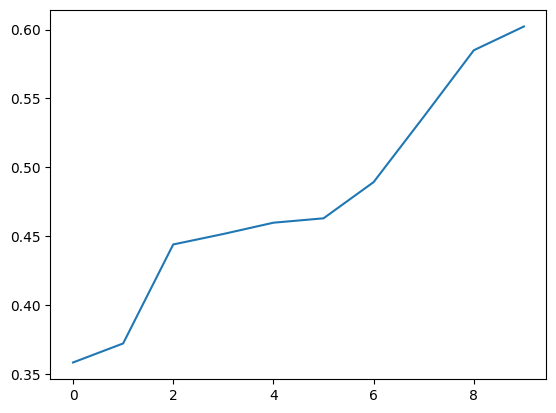

In [144]:
cost = []
U_matrices = []

for i in range(10):
    U_real = np.random.rand(N,N)
    U_complex = np.random.rand(N,N)
    U_init = np.zeros((N,N),dtype = 'complex_')
    U_init = U_real + 1j*U_complex
    #U_init = U_init / np.linalg.norm(U_init)
    U_init = U_init.flatten()
    #minimization
    minimum = minimize(cost_fun, U_init, method='BFGS', tol=1e-4)#, constraints=[nonlinear_constraint])
    cost.append(-1*minimum.fun)
    U_matrices.append(minimum.x)
 
print(cost) 
cost = np.array(cost)
#U_matrices = np.array(U_matrices)    
sorted_indices = np.argsort(cost)
cost = cost[sorted_indices]
#U_matrices = U_matrices[sorted_indices]
    
plt.plot(cost)
plt.show()

In [142]:
#U_matrices[-1] = U_matrices[-1]/np.linalg.norm(U_matrices[-1])
for i in range(len(U_matrices)):
    print(cost_fun(U_matrices[i]))


-0.505568963290735
-0.35172898800955643
-0.47155014089753977
-0.4883972504539259
-0.5201602326330165
-0.6163290955349606
-0.5100273377180262
-0.6138066915319652
-0.5108628165228577
-0.4915205177046794
